In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [14]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [16]:
x_train=x_train/255.0
x_test=x_test/255.0

In [17]:
x_train.reshape(-1,)
x_test.reshape(-1,)

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel([y[index]])

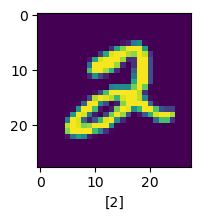

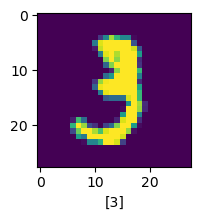

In [19]:
plot_sample(x_train, y_train, 5), 
plot_sample(x_train, y_train, 10)

In [20]:
ann_model = models.Sequential([
    layers.Flatten(input_shape = (28,28)),
    layers.Dense(100,activation='relu'),
    layers.Dense(150,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\Rushikesh\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
ann_model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
history = ann_model.fit(x_train, y_train, validation_split=0.2, batch_size=64, epochs=5)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5712 - loss: 1.5550 - val_accuracy: 0.8819 - val_loss: 0.4560
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8788 - loss: 0.4472 - val_accuracy: 0.9048 - val_loss: 0.3403
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9008 - loss: 0.3525 - val_accuracy: 0.9159 - val_loss: 0.2971
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9134 - loss: 0.3090 - val_accuracy: 0.9221 - val_loss: 0.2726
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9209 - loss: 0.2821 - val_accuracy: 0.9272 - val_loss: 0.2553


In [27]:
from sklearn.metrics import classification_report

y_pred = ann_model.predict(x_train)
y_pred_classes = [np.argmax(num) for num in y_pred]

print("Classification report of training: \n", classification_report(y_train, y_pred_classes))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Classification report of training: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      5923
           1       0.95      0.97      0.96      6742
           2       0.91      0.91      0.91      5958
           3       0.92      0.89      0.91      6131
           4       0.93      0.92      0.93      5842
           5       0.93      0.86      0.89      5421
           6       0.93      0.96      0.95      5918
           7       0.94      0.93      0.94      6265
           8       0.89      0.91      0.90      5851
           9       0.89      0.91      0.90      5949

    accuracy                           0.93     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.93      0.93      0.92     60000



In [43]:
def graph(accuracy, loss, epochs):
    plt.figure(figsize=(10, 4))
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.title('Accuracy Graph')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy/Loss')
    plt.legend()
    plt.show()

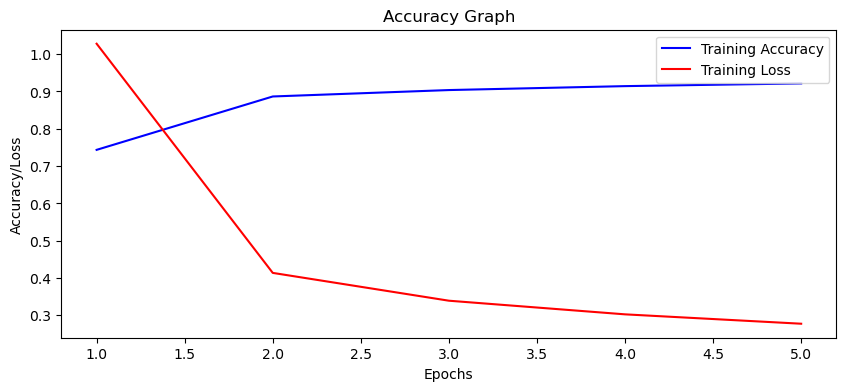

In [45]:
n = len(history.history['accuracy'])
graph(history.history['accuracy'], history.history['loss'], range(1, n+1))

In [37]:
ann_model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9132 - loss: 0.2995


[0.26033759117126465, 0.9243999719619751]

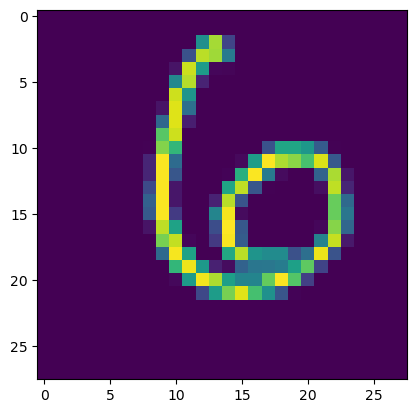

In [53]:
plt.imshow(x_test[100])

In [54]:
y_test[100]

6